In [1]:
import hvplot.pandas
import pandas as pd
import json
import requests
import matplotlib


In [2]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
url = "https://data.lacity.org/resource/2nrs-mtv8.json?"
limit = "&$limit=1000000"
token = "$$app_token=2chCzz50gH6DpOapebwdtsXcQ"
# params = {"token": "$$app_token=2chCzz50gH6DpOapebwdtsXcQ",
#           "limit": "&$limit=10000"
# }
response = requests.get(url,limit).json()

In [3]:
# To check total rows
len(response)

925720

In [4]:
response

[{'dr_no': '190326475',
  'date_rptd': '2020-03-01T00:00:00.000',
  'date_occ': '2020-03-01T00:00:00.000',
  'time_occ': '2130',
  'area': '07',
  'area_name': 'Wilshire',
  'rpt_dist_no': '0784',
  'part_1_2': '1',
  'crm_cd': '510',
  'crm_cd_desc': 'VEHICLE - STOLEN',
  'vict_age': '0',
  'vict_sex': 'M',
  'vict_descent': 'O',
  'premis_cd': '101',
  'premis_desc': 'STREET',
  'status': 'AA',
  'status_desc': 'Adult Arrest',
  'crm_cd_1': '510',
  'crm_cd_2': '998',
  'location': '1900 S  LONGWOOD                     AV',
  'lat': '34.0375',
  'lon': '-118.3506'},
 {'dr_no': '200106753',
  'date_rptd': '2020-02-09T00:00:00.000',
  'date_occ': '2020-02-08T00:00:00.000',
  'time_occ': '1800',
  'area': '01',
  'area_name': 'Central',
  'rpt_dist_no': '0182',
  'part_1_2': '1',
  'crm_cd': '330',
  'crm_cd_desc': 'BURGLARY FROM VEHICLE',
  'mocodes': '1822 1402 0344',
  'vict_age': '47',
  'vict_sex': 'M',
  'vict_descent': 'O',
  'premis_cd': '128',
  'premis_desc': 'BUS STOP/LAYOVER

In [58]:
# Create a dataframe
response_df = pd.DataFrame(response)

In [59]:
#Display the new dataframe
response_df.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4
0,190326475,2020-03-01T00:00:00.000,2020-03-01T00:00:00.000,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,998,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN
1,200106753,2020-02-09T00:00:00.000,2020-02-08T00:00:00.000,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,...,998,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN,NaN
2,200320258,2020-11-11T00:00:00.000,2020-11-04T00:00:00.000,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,NaN,1400 W 37TH ST,34.021,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN
3,200907217,2023-05-10T00:00:00.000,2020-03-10T00:00:00.000,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN
4,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN


In [60]:
#Total rows in new dataframe: 925,720
response_df["dr_no"].count()

925720

In [61]:
#Check the name of the columns
response_df.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'status',
       'status_desc', 'crm_cd_1', 'crm_cd_2', 'location', 'lat', 'lon',
       'mocodes', 'weapon_used_cd', 'weapon_desc', 'cross_street', 'crm_cd_3',
       'crm_cd_4'],
      dtype='object')

In [62]:
# Change latitude and longitute from object to float
response_df["lon"] = response_df["lon"].astype(float)
response_df["lat"] = response_df["lat"].astype(float)

In [63]:
#Confirm lon, lat as float
response_df.dtypes

dr_no              object
date_rptd          object
date_occ           object
time_occ           object
area               object
area_name          object
rpt_dist_no        object
part_1_2           object
crm_cd             object
crm_cd_desc        object
vict_age           object
vict_sex           object
vict_descent       object
premis_cd          object
premis_desc        object
status             object
status_desc        object
crm_cd_1           object
crm_cd_2           object
location           object
lat               float64
lon               float64
mocodes            object
weapon_used_cd     object
weapon_desc        object
cross_street       object
crm_cd_3           object
crm_cd_4           object
dtype: object

In [148]:
#Create a copy of the dataframe to preserve the original
response_df_formatted = response_df.copy()

In [149]:
#Create a clean Dataframe by drop latitud and longitute = 0
response_df_formatted=response_df_formatted.loc[response_df_formatted["lon"] != 0]

In [150]:
# Confirm dataframe as been cleaned
response_df_formatted.loc[response_df_formatted["lat"] == 0]

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4


In [151]:
# To convert date occurence format, from object to date
# source: https://stackoverflow.com/questions/68296206/pandas-period-to-to-timestamp-giving-me-typeerror
response_df_formatted["date_occ"] =pd.to_datetime(response_df_formatted["date_occ"])
response_df_formatted


,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4
0,190326475,2020-03-01T00:00:00.000,2020-03-01,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,998,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN
1,200106753,2020-02-09T00:00:00.000,2020-02-08,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,...,998,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN,NaN
2,200320258,2020-11-11T00:00:00.000,2020-11-04,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,NaN,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN
3,200907217,2023-05-10T00:00:00.000,2020-03-10,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN
4,220614831,2022-08-18T00:00:00.000,2020-08-17,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925715,241605270,2024-02-11T00:00:00.000,2024-02-11,1920,16,Foothill,1681,2,888,TRESPASSING,...,NaN,8700 SHARP AV,34.2278,-118.4051,0913 1202 1501,NaN,NaN,NaN,NaN,NaN
925716,241604405,2024-01-14T00:00:00.000,2024-01-13,0720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,NaN,8700 LANKERSHIM BL,34.2271,-118.3878,0400 1822 1310 0416,207,OTHER KNIFE,NaN,NaN,NaN
925717,242106032,2024-02-20T00:00:00.000,2024-02-17,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,NaN,22700 NAPA ST,34.2260,-118.6214,0385,NaN,NaN,NaN,NaN,NaN
925718,242004546,2024-01-16T00:00:00.000,2024-01-16,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,HOBART BL,34.0690,-118.3054,2047 0400 0429 0444 1202 1822,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3RD ST,NaN,NaN


In [152]:
# To confirm that date occurence format change successfully
response_df_formatted.dtypes

dr_no                     object
date_rptd                 object
date_occ          datetime64[ns]
time_occ                  object
area                      object
area_name                 object
rpt_dist_no               object
part_1_2                  object
crm_cd                    object
crm_cd_desc               object
vict_age                  object
vict_sex                  object
vict_descent              object
premis_cd                 object
premis_desc               object
status                    object
status_desc               object
crm_cd_1                  object
crm_cd_2                  object
location                  object
lat                      float64
lon                      float64
mocodes                   object
weapon_used_cd            object
weapon_desc               object
cross_street              object
crm_cd_3                  object
crm_cd_4                  object
dtype: object

In [153]:
#Drop crimes occured past before past Mar31/2024 (Team agreed on excluding Apr/2024 data, as it will gather partial data)
#source = https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/
response_df_formatted = response_df_formatted.loc[(response_df_formatted["date_occ"] >= "2020-03-10") & (response_df_formatted["date_occ"] <="2024-03-31")]
response_df_formatted

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4
2,200320258,2020-11-11T00:00:00.000,2020-11-04,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,NaN,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN
3,200907217,2023-05-10T00:00:00.000,2020-03-10,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN
4,220614831,2022-08-18T00:00:00.000,2020-08-17,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN
5,231808869,2023-04-04T00:00:00.000,2020-12-01,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,NaN,9900 COMPTON AV,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN
6,230110144,2023-04-04T00:00:00.000,2020-07-03,0900,01,Central,0182,2,354,THEFT OF IDENTITY,...,NaN,1100 S GRAND AV,34.0415,-118.2620,0930 0929,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925715,241605270,2024-02-11T00:00:00.000,2024-02-11,1920,16,Foothill,1681,2,888,TRESPASSING,...,NaN,8700 SHARP AV,34.2278,-118.4051,0913 1202 1501,NaN,NaN,NaN,NaN,NaN
925716,241604405,2024-01-14T00:00:00.000,2024-01-13,0720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,NaN,8700 LANKERSHIM BL,34.2271,-118.3878,0400 1822 1310 0416,207,OTHER KNIFE,NaN,NaN,NaN
925717,242106032,2024-02-20T00:00:00.000,2024-02-17,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,NaN,22700 NAPA ST,34.2260,-118.6214,0385,NaN,NaN,NaN,NaN,NaN
925718,242004546,2024-01-16T00:00:00.000,2024-01-16,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,HOBART BL,34.0690,-118.3054,2047 0400 0429 0444 1202 1822,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3RD ST,NaN,NaN


In [154]:
#Extract year and month from date and put it in a new column
# Source:  https://stackoverflow.com/questions/37632766/python-pandas-get-fiscal-quarter-from-fiscal-year-and-month-for-uk
response_df_formatted["quarter"] = response_df_formatted["date_occ"].dt.quarter
response_df_formatted

C:\Users\roala\AppData\Local\Temp\ipykernel_1424\876511147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df_formatted["quarter"] = response_df_formatted["date_occ"].dt.quarter


,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,quarter
2,200320258,2020-11-11T00:00:00.000,2020-11-04,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,4
3,200907217,2023-05-10T00:00:00.000,2020-03-10,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,1
4,220614831,2022-08-18T00:00:00.000,2020-08-17,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,3
5,231808869,2023-04-04T00:00:00.000,2020-12-01,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,9900 COMPTON AV,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN,4
6,230110144,2023-04-04T00:00:00.000,2020-07-03,0900,01,Central,0182,2,354,THEFT OF IDENTITY,...,1100 S GRAND AV,34.0415,-118.2620,0930 0929,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925715,241605270,2024-02-11T00:00:00.000,2024-02-11,1920,16,Foothill,1681,2,888,TRESPASSING,...,8700 SHARP AV,34.2278,-118.4051,0913 1202 1501,NaN,NaN,NaN,NaN,NaN,1
925716,241604405,2024-01-14T00:00:00.000,2024-01-13,0720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,8700 LANKERSHIM BL,34.2271,-118.3878,0400 1822 1310 0416,207,OTHER KNIFE,NaN,NaN,NaN,1
925717,242106032,2024-02-20T00:00:00.000,2024-02-17,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,22700 NAPA ST,34.2260,-118.6214,0385,NaN,NaN,NaN,NaN,NaN,1
925718,242004546,2024-01-16T00:00:00.000,2024-01-16,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,HOBART BL,34.0690,-118.3054,2047 0400 0429 0444 1202 1822,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3RD ST,NaN,NaN,1


In [156]:
#Extract year from date and put it in a new column
#year = year of occurrence
response_df_formatted['Year'] = pd.to_datetime(response_df_formatted['date_occ']).dt.strftime('%Y')
response_df_formatted = response_df_formatted.drop(['date_occ'], axis=1)
response_df_formatted.head()


C:\Users\roala\AppData\Local\Temp\ipykernel_1424\21195527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df_formatted['Year'] = pd.to_datetime(response_df_formatted['date_occ']).dt.strftime('%Y')


,dr_no,date_rptd,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,vict_age,...,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,quarter,Year
2,200320258,2020-11-11T00:00:00.000,1700,03,Southwest,0356,1,480,BIKE - STOLEN,19,...,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,4,2020
3,200907217,2023-05-10T00:00:00.000,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,...,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,1,2020
4,220614831,2022-08-18T00:00:00.000,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,28,...,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,3,2020
5,231808869,2023-04-04T00:00:00.000,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,41,...,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN,4,2020
6,230110144,2023-04-04T00:00:00.000,0900,01,Central,0182,2,354,THEFT OF IDENTITY,25,...,34.0415,-118.2620,0930 0929,NaN,NaN,NaN,NaN,NaN,3,2020


In [157]:
# To confirm year column is store successfully for the entire data
response_df_formatted.count()

dr_no             882266
date_rptd         882266
time_occ          882266
area              882266
area_name         882266
rpt_dist_no       882266
part_1_2          882266
crm_cd            882266
crm_cd_desc       882266
vict_age          882266
vict_sex          763330
vict_descent      763321
premis_cd         882255
premis_desc       881725
status            882266
status_desc       882266
crm_cd_1          882255
crm_cd_2           63904
location          882266
lat               882266
lon               882266
mocodes           757288
weapon_used_cd    304250
weapon_desc       304250
cross_street      137715
crm_cd_3            2147
crm_cd_4              61
quarter           882266
Year              882266
dtype: int64

In [167]:
#group by total crimes / Q1
response_df_q1 = response_df_formatted.loc[response_df_formatted["quarter"] == 1]
response_df_q1.groupby(["Year"])["dr_no"].count()


Year
2020    10884
2021    47998
2022    55948
2023    57473
2024    50260
Name: dr_no, dtype: int64

In [168]:
#group by total crimes / Q2
response_df_q2 = response_df_formatted.loc[response_df_formatted["quarter"] == 2]
response_df_q2.groupby(["Year"])["dr_no"].count()

Year
2020    49664
2021    49830
2022    60496
2023    56358
Name: dr_no, dtype: int64

In [169]:
#group by total crimes / Q3
response_df_q3 = response_df_formatted.loc[response_df_formatted["quarter"] == 3]
response_df_q3.groupby(["Year"])["dr_no"].count()

Year
2020    49436
2021    54934
2022    59399
2023    59078
Name: dr_no, dtype: int64

In [170]:
#group by total crimes / Q4
response_df_q4 = response_df_formatted.loc[response_df_formatted["quarter"] == 4]
response_df_q4.groupby(["Year"])["dr_no"].count()

Year
2020    47814
2021    55427
2022    59025
2023    58242
Name: dr_no, dtype: int64

In [13]:
# Configure the map plot, adding the year of the crime by location
map_plot_0 = response_df_formatted.hvplot.points(
    "lon",
    "lat",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    color="Year",
    title = "Crime by Coordinates",
    alpha = 0.5
)

In [14]:
map_plot_0

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lon,lat]   (Year)

In [15]:

y_value = response_df_formatted.groupby(["Year"]).count()


In [16]:
y_value.reset_index(inplace=True)

<Axes: xlabel='Year'>

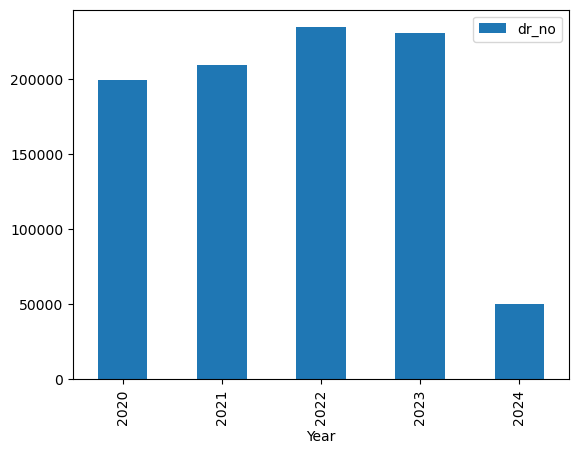

In [17]:
y_value.plot(kind="bar",x="Year",y="dr_no")

In [18]:
response_df_formatted.columns

Index(['dr_no', 'date_rptd', 'time_occ', 'area', 'area_name', 'rpt_dist_no',
       'part_1_2', 'crm_cd', 'crm_cd_desc', 'vict_age', 'vict_sex',
       'vict_descent', 'premis_cd', 'premis_desc', 'status', 'status_desc',
       'crm_cd_1', 'crm_cd_2', 'location', 'lat', 'lon', 'mocodes',
       'weapon_used_cd', 'weapon_desc', 'cross_street', 'crm_cd_3', 'crm_cd_4',
       'Year'],
      dtype='object')

KeyError: 'date_occ'